# Clase 4: Pandas

## Pandas 1

**Pandas** es un módulo muy popular para **manipulación y análisis de datos.** Está hecho sobre Numpy y provee
estructuras de datos diseñadas para trabajar con datos de tablas. A diferencia de un array de numpy, **pandas permite trabajar con distintos tipos de datos para cada columna** asemejándose más a lo que se usa en bases de datos relacionales.<br>
Tiene dos estructuras de datos: la **serie** y el **dataframe.** El primero es un arreglo unidimensional etiquetado y con un tipo de dato determinado. El dataframe es una estructura bidimensional similar a una tabla que admite etiquetas para filas y columnas.<br>
**Cada columna de un dataframe es una serie.**

### Series
La serie es una estructura de datos **unidimensional** en donde **cada dato tiene además una etiqueta**. Es una estructura mutable a la que no sólo se le puede cambiar sus elementos (como en un array de numpy) si no que además **se le pueden agregar y quitar elementos** (a diferencia de un array).<br>
**Se refiere a las etiquetas colectivamente como index**, y las etiquetas no tienen por qué ser únicas. Estas etiquetas añaden funcionalidad para manipular los datos. Para crear una serie se usa el constructor **pd.Series()** que es capaz de convertir a serie distintas estructuras como listas, diccionarios, arrays, etc. <br>
También **tiene un atributo nombre**, que es el que se utiliza como **etiqueta de la columna cuando forma parte de un dataframe.**

In [3]:
import pandas as pd
pd.Series([5,7,2])

0    5
1    7
2    2
dtype: int64

In [5]:
pd.Series([5,7,2], index=["a","b","c"], dtype="int8",name="numeros")

a    5
b    7
c    2
Name: numeros, dtype: int8

In [7]:
pd.Series({"Martin": 8, "Juan":9, "Lucia": 7}, name= "Notas")

Martin    8
Juan      9
Lucia     7
Name: Notas, dtype: int64

### Dataframe 
El dataframe es la estructura más utilizada de pandas. **Es una estructura bidimensional tipo tabla con etiquetas para
filas y columnas**, lo que da más flexibilidad a la hora de manipular los datos. Cada columna puede tener su propio
tipo de dato.<br>
Es mutable tanto en los datos como en su tamaño, por lo que **se pueden añadir o quitar filas y columnas.** Cada columna es una serie en donde **todas las series tienen el mismo index.**<br>
Se puede construir dataframes a partir de muchas estructuras diferentes como listas, arrays y diccionarios

In [9]:
# Desde listas anidadas:
pd.DataFrame([[0,1,2],[3,4,5],[6,7,8]])

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8


In [10]:
# Desde listas anidadas definiendo INDEX y COLUMNS
pd.DataFrame([[0,1,2],[3,4,5],[6,7,8]], index=["a","b","c"],columns=["lunes","martes","miercoles"])

,lunes,martes,miercoles
a,0,1,2
b,3,4,5
c,6,7,8


In [11]:
# Desde un diccionario
pd.DataFrame({"Columna 1": [1,2,3],"Columna 2": [4,5,6], "Columna 3": [7,8,9]}, index= ["A","B","C"])

,Columna 1,Columna 2,Columna 3
A,1,4,7
B,2,5,8
C,3,6,9


### Lectura de Archivos 
Pandas tiene numerosas funciones para **leer diferentes formatos de archivos y construir dataframes a partir de ellos.** <br>
Esto **facilita** enormemente la tarea de **importar los datos.**<br>
Entre los formatos que se pueden leer podemos encontrar **csv, excel, json, html, sql, entre otros.**
Los nombres de **estas funciones empiezan con el prefijo read_, por ejemplo, pd.read_csv, pd.read_excel, etc.**<br>
Cada una de estas funciones tiene numerosos parámetros para controlar cómo se realiza la lectura si es necesario.

Para practicar las funcionalidades que ofrece pandas vamos a trabajar con un dataset muy conocido, el del **Titanic.** 
Vamos a abrir el archivo con la función **read_csv**. El primer parámetro puede ser un string con la ruta absoluta o relativa al archivo.<br>
Si el archivo se encuentra en el mismo directorio que la jupyter notebook, se puede poner simplemente el nombre
del archivo. Además, se pueden pasar URLs de archivos csv.
**La función va a crear un DataFrame a partir del archivo.** En general no hace falta especificar más parámetros pero si es necesario se puede controlar cada detalle de cómo se realiza la lectura del archivo.

In [12]:
data = pd.read_csv("../Recursos/titanic.csv")

In [13]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Explorando el dataframe
Se pueden visualizar **filas del comienzo del dataframe con el método head, y del final con el método tail.** En ambos se puede especificar la cantidad de filas a imprimir. <br>
**El método info imprime información sobre un DataFrame** que incluye el tipo de índice y los tipos de columna, los valores no nulos y el uso de memoria.<br>
También se puede ver los atributos **dtypes** (tipo de dato de cada columna), **shape** (dimensiones del dataframe), **size** (cantidad de elementos). Las etiquetas se pueden ver con los atributos **index y columns**, que además permiten reasignarlos para modificar las etiquetas. El atributo **values** devuelve una representación del dataframe como un array de numpy.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
#Cantidad de filas y columnas 
data.shape

(891, 12)

In [20]:
# Tipos de cada Serie (Cada columna)
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
#Cantidad de elementos
data.size

10692

In [23]:
#Nombres de las columnas:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
#Primeros elementos
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
#Ultimos 10 elementos
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


## Pandas 2

### Indexing
El hecho de utilizar etiquetas hace que Pandas ofrezca una variedad de formas para manipular los datos.<br>
**La indexación directa sobre una serie devuelve uno de sus elementos y sobre un dataframe devuelve una de
sus columnas** (cada una de ellas es una serie). Hay que usar como índice el elemento que se tenga como etiqueta, similar a lo que sucede con diccionarios. Se puede usar un rango en caso de las series.

In [28]:
serie = pd.DataFrame([5,7,2,3,4,3,9,8], index=["a","b","c","d","e","f","g","h"], )
print(serie)

   0
a  5
b  7
c  2
d  3
e  4
f  3
g  9
h  8


In [29]:
serie["b":"e"]

,0
b,7
c,2
d,3
e,4


Un dataframe también puede ser indexado con una lista de columnas, devolviendo un dataframe.

In [35]:
data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [39]:
data[["Age","Name"]]

,Age,Name
0,22.0,"Braund, Mr. Owen Harris"
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,26.0,"Heikkinen, Miss. Laina"
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,35.0,"Allen, Mr. William Henry"
...,...,...
886,27.0,"Montvila, Rev. Juozas"
887,19.0,"Graham, Miss. Margaret Edith"
888,NaN,"Johnston, Miss. Catherine Helen ""Carrie"""
889,26.0,"Behr, Mr. Karl Howell"


## Label Indexing
Pandas provee un método general muy versátil para seleccionar elementos en base a las etiquetas. Esto se
hace a través del atributo **.loc**<br>
Para seleccionar un elementos se ponen las etiquetas que le correspondan.
Recordemos que las etiquetas pueden ser cualquier objeto de python, incluso números. Cuando se usan
números con loc, estos representan las etiquetas y no las posiciones.<br>
También se pueden hacer slices con etiquetas. En este caso **el slice es inclusivo tanto con la primer etiqueta
como con la segunda** También se pueden poner listas para seleccionar etiquetas específicas.

In [40]:
#Con loc accedemos a traves de las etiquetas. En el caso de las filas, estamos colocando numeros porque el index es numerico.
data.loc[3,"Name"]

'Futrelle, Mrs. Jacques Heath (Lily May Peel)'

In [41]:
data.loc[25:30,"Name"]

25    Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...
26                              Emir, Mr. Farred Chehab
27                       Fortune, Mr. Charles Alexander
28                        O'Dwyer, Miss. Ellen "Nellie"
29                                  Todoroff, Mr. Lalio
30                             Uruchurtu, Don. Manuel E
Name: Name, dtype: object

In [42]:
data.loc[[25,30],["Survived","Age"]]

,Survived,Age
25,1,38.0
30,0,40.0


## Integer Indexing
A su vez existe el método **iloc** para acceder a los elementos **según las posiciones.** En este caso los
números representan las posiciones y no las etiquetas. Funciona como los slices de numpy.
La primera posición empieza a contar desde cero, los slices **incluyen el primer índice pero excluyen
el segundo.** También se pueden poner listas de índices

In [43]:
#Con iloc es todo numerico
data.iloc[125,4]

'male'

In [44]:
# En este caso el 18 no esta incluido:
data.iloc[10:18,-3]

10    16.7000
11    26.5500
12     8.0500
13    31.2750
14     7.8542
15    16.0000
16    29.1250
17    13.0000
Name: Fare, dtype: float64

In [45]:
data.iloc[[15,30],[2,5]]

,Pclass,Age
15,2,55.0
30,1,40.0


### Filtros
También es posible seleccionar elementos **según condiciones de sus valores**. La expresión condicional produce un arreglo de booleanos y se devuelven los valores para los que el valor de ese arreglo es verdadero.<br>
- **data[“Age”] >=30** devuelve una serie de booleanos <br>
- **data[data[“Age”] >= 30]** devuelve todas las filas del dataframe para las cuales el valor de la edad es mayor o igual a 30.<br>

<br>

También se pueden usar condiciones dentro de loc y de iloc, para una o las dos dimensiones. Por ejemplo: <br>
**data.loc[data["Age"] >= 30, ["Name", "Sex"]]** selecciona las filas de las columnas Name y Sex cuyas edades son mayores o iguales a 30.

In [48]:
data[data["Age"]>=30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [50]:
data.loc[data["Age"] >=30,["Name","Sex"]]

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
6,"McCarthy, Mr. Timothy J",male
11,"Bonnell, Miss. Elizabeth",female
...,...,...
873,"Vander Cruyssen, Mr. Victor",male
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female
881,"Markun, Mr. Johann",male
885,"Rice, Mrs. William (Margaret Norton)",female


## Pandas 3

### Índices
Las **etiquetas** son una parte fundamental de las estructuras de Pandas, muchas de las funcionalidades dependen de ellas. Por lo tanto, es importante poder manipular y modificarlas según sea necesario. Las etiquetas están alojadas en una estructura llamada **Index.** En un dataframe tenemos tenemos un **Index para las filas y otro para las columnas en los atributos index y columns.**
Es posible modificar un index completamente simplemente reasignándolo, por ejemplo, por una lista que debe tener la misma cantidad de elementos.

In [51]:
dataframe = pd.DataFrame([[3,6,2],[6,8,5],[7,0,5],[4,3,8]])
dataframe

,0,1,2
0,3,6,2
1,6,8,5
2,7,0,5
3,4,3,8


In [52]:
dataframe.index=["Fila1","Fila 2","Fila 3","Fila 4"]
dataframe.columns = ["Col 1", "Col 2", "Col 3"]
dataframe

,Col 1,Col 2,Col 3
Fila1,3,6,2
Fila 2,6,8,5
Fila 3,7,0,5
Fila 4,4,3,8


Los objetos de tipo Index no soportan la asignación de ítems, no se puede cambiar uno de sus elementos por asignación directa.
<br>
Esta modificación la podemos realizar de dos maneras:
<ul>
- <b>Modificando directamente el array de numpy</b> que aloja los datos del Index a través del atributo <b>values.</b><br>
- Usando el método <b>rename</b>, que sirve para filas y columnas. Se le puede pasar un diccionario con los nombres de las etiquetas que queremos cambiar.<br>
<br>
</ul>
También se puede pasar una función a aplicar a todos los elementos del Index. Por defecto, esta operación devuelve otro dataframe con los índices modificados. <b>Si queremos modificar los índices del dataframe actual podemos usar el parámetro inplace = True</b>

In [53]:
dataframe.index[0]="FILA 1"

TypeError: Index does not support mutable operations

In [54]:
dataframe.index.values[0]="FILA 1"
dataframe

,Col 1,Col 2,Col 3
FILA 1,3,6,2
Fila 2,6,8,5
Fila 3,7,0,5
Fila 4,4,3,8


In [57]:
dataframe.rename(index={"Fila 2": "FILA 2"},inplace = True)
dataframe

,Col 1,Col 2,Col 3
FILA 1,3,6,2
FILA 2,6,8,5
Fila 3,7,0,5
Fila 4,4,3,8


In [59]:
dataframe.rename(index = str.upper, columns = lambda x : x.replace("Col","Columna"),inplace=True)
dataframe

,Columna 1,Columna 2,Columna 3
FILA 1,3,6,2
FILA 2,6,8,5
FILA 3,7,0,5
FILA 4,4,3,8


### reset_index
Para **convertir el Index en una columna** se usa el método reset_index. Éste transforma el Index en un columna y resetea el índice a un rango de números.<br>
Si solamente queremos resetear el Index y **descartar los valores sin convertirlos en una columna**, usamos el parámetro **drop = True.**


In [70]:
ventas =pd.DataFrame([[25,34700],[32,41500],[29,37200]], columns=["Articulos vendidos","Facturacion"], index= ["Enero","Febrero","Marzo"])
ventas


,Articulos vendidos,Facturacion
Enero,25,34700
Febrero,32,41500
Marzo,29,37200


In [74]:
ventas= ventas.reset_index()
ventas

,index,Articulos vendidos,Facturacion
0,Enero,25,34700
1,Febrero,32,41500
2,Marzo,29,37200


### reindex
El método reindex permite **cambiar el orden en que se encuentran las etiquetas pero manteniendo la alineación de los datos con la etiqueta original.** Sólo se conservan las filas cuyas etiquetas se indiquen explícitamente.<br>
Si se agregan etiquetas nuevas, los valores correspondientes se llenan con missing values a menos que explícitamente se indique el valor deseado en el parámetro **fill_value**

In [77]:
ventas =pd.DataFrame([[25,34700],[32,41500],[29,37200]], columns=["Articulos vendidos","Facturacion"], index= ["Enero","Febrero","Marzo"])
print (ventas)
print( ventas.reindex(["Marzo","Enero","Septiembre"]))

         Articulos vendidos  Facturacion
Enero                    25        34700
Febrero                  32        41500
Marzo                    29        37200
            Articulos vendidos  Facturacion
Marzo                     29.0      37200.0
Enero                     25.0      34700.0
Septiembre                 NaN          NaN


## Pandas 4

### Operaciones aritméticas
Cuando realizamos operaciones entre series o dataframes, **todas las operaciones son alineadas según las etiquetas** (recordemos que en numpy la alineación es por la posición).<br>
Consideremos dos series con la misma cantidad de elementos pero que sólo comparten algunos índices. **Si realizamos la suma de las series los elementos, se van a
sumar sólo si comparten el mismo índice.** <br>
En el caso de que haya **índices que estén presentes en una serie pero no en la otra, los elementos se van a completar con NaN** de modo que la nueva serie tenga todos los índices de ambas series.

In [80]:
s1 = pd.Series([1,2,3,4])
s2 = pd.Series([5,6,7,8], index = [7,8,9,10])
print(s1)
print(s2)

0    1
1    2
2    3
3    4
dtype: int64
7     5
8     6
9     7
10    8
dtype: int64


In [82]:
#Al no tener el mismo index:
s1 + s2

0    NaN
1    NaN
2    NaN
3    NaN
7    NaN
8    NaN
9    NaN
10   NaN
dtype: float64

### Alineación
Con dataframes la alineación sucede tanto en filas como en columnas.

In [85]:
df1 = pd.DataFrame([[1,1,1,1],[0,0,0,0],[1,2,3,4],[0,1,0,1]], columns = ["A","B","C","D"])
df2 = pd.DataFrame([[1,1,1,1],[0,0,0,0],[1,2,3,4],[0,1,0,1]], columns = ["C","D","E","F"], index= [3,4,5,6])
print("Data frame 1: \n" , df1)
print("Data frame 2: \n" , df2)

Data frame 1: 
    A  B  C  D
0  1  1  1  1
1  0  0  0  0
2  1  2  3  4
3  0  1  0  1
Data frame 2: 
    C  D  E  F
3  1  1  1  1
4  0  0  0  0
5  1  2  3  4
6  0  1  0  1


In [86]:
print("La suma de los Data frame con distintos indices y nombres de columnas: \n" , df1 + df2)

La suma de los Data frame con distintos indices y nombres de columnas: 
     A   B    C    D   E   F
0 NaN NaN  NaN  NaN NaN NaN
1 NaN NaN  NaN  NaN NaN NaN
2 NaN NaN  NaN  NaN NaN NaN
3 NaN NaN  1.0  2.0 NaN NaN
4 NaN NaN  NaN  NaN NaN NaN
5 NaN NaN  NaN  NaN NaN NaN
6 NaN NaN  NaN  NaN NaN NaN


### Operaciones
Podemos operar entre dos columnas de un dataframe. En este caso se comparte el índice, por
lo que todos los datos se encuentran alineados.<br>
Sólo **si alguno de los valores es NaN el resultado correspondiente también lo será.**<br>
Estas operaciones generan una nueva serie, que se puede usar para crear una nueva columna en el dataframe o para reemplazar una existente. Esto se logra con una asignación directa.


In [93]:
import numpy as np
df1 = pd.DataFrame([[9,11,2,10],[4,4,18,17],[10,12,0,0],[8,8,0,2],[0,np.nan,18,3],[1,np.nan,10,2]], columns=["A","B","C","D"])
print("Data frame: \n", df1)
print("Suma de las columnas A y B: \n", df1["A"]+df1["B"])

Data frame: 
     A     B   C   D
0   9  11.0   2  10
1   4   4.0  18  17
2  10  12.0   0   0
3   8   8.0   0   2
4   0   NaN  18   3
5   1   NaN  10   2
Suma de las columnas A y B: 
 0    20.0
1     8.0
2    22.0
3    16.0
4     NaN
5     NaN
dtype: float64


In [94]:
# Podemos crear una nueva columna: 
df1["E"] = df1["A"]+df1["B"]
print("Creamos la columna E Sumando  las columnas A y B: \n", df1)

Creamos la columna E Sumando  las columnas A y B: 
     A     B   C   D     E
0   9  11.0   2  10  20.0
1   4   4.0  18  17   8.0
2  10  12.0   0   0  22.0
3   8   8.0   0   2  16.0
4   0   NaN  18   3   NaN
5   1   NaN  10   2   NaN


In [95]:
# Podemos  reasignar el valor de una columna: 
df1["E"] = df1["A"]+df1["A"]
print("Ahora la columna E vale 2* columna A: \n", df1)

Ahora la columna E vale 2* columna A: 
     A     B   C   D   E
0   9  11.0   2  10  18
1   4   4.0  18  17   8
2  10  12.0   0   0  20
3   8   8.0   0   2  16
4   0   NaN  18   3   0
5   1   NaN  10   2   2


### Métodos asociados
Todos los operadores tienen métodos asociados que permiten realizar la misma operación. Sin embargo, los métodos ofrecen la posibilidad de controlar ciertos parámetros, dando más
flexibilidad a la hora de hacer las operaciones.<br>
Por ejemplo, el parámetro **fill_value completa los NaN existentes en los objetos antes de la operación.** También utiliza este valor para cualquier alineación que sea necesaria (en caso
de que no exista la etiqueta en una de las estructuras)<br>
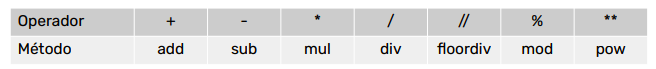

In [122]:
s3 = pd.Series([9,5,10,8,0,1]) #Indices x defecto: 0 ...5
s4 = pd.Series([17,4,1,0,0,0], index = [4,5,6,7,8,9])
# Alinea los indices
print(s3.add(s4))

0     NaN
1     NaN
2     NaN
3     NaN
4    17.0
5     5.0
6     NaN
7     NaN
8     NaN
9     NaN
dtype: float64


In [125]:
#Usando fill_value en vez de Nan usamos un valor por defecto antes de realizar la operacion:
print(s3.add(s4, fill_value=0))

0     9.0
1     5.0
2    10.0
3     8.0
4    17.0
5     5.0
6     1.0
7     0.0
8     0.0
9     0.0
dtype: float64


Los métodos asociados también permiten controlar cómo se realiza el **broadcasting entre dataframes y series.** <br>
En este caso **la alineación por defecto es por columnas**, es decir que al hacer la operación se van a comparar los índices de la serie con las columnas del dataframe. Si sumamos directamente un dataframe con una de sus columnas (y los índices de las filas son distintos de las columnas), ningún dato se va a encontrar alineado. **Para controlar que la alineación se haga por filas podemos usar el método con el parámetro axis = index.**

In [126]:
df1

,A,B,C,D,E
0,9,11.0,2,10,18
1,4,4.0,18,17,8
2,10,12.0,0,0,20
3,8,8.0,0,2,16
4,0,NaN,18,3,0
5,1,NaN,10,2,2


In [127]:
df1 + df1["A"]

,A,B,C,D,E,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df1.add(df1["A"], axis = "index")

,A,B,C,D,E
0,18,20.0,11,19,27
1,8,8.0,22,21,12
2,20,22.0,10,10,30
3,16,16.0,8,10,24
4,0,NaN,18,3,0
5,2,NaN,11,3,3


### Comparaciones
También existen los **operadores de comparación y sus métodos correspondientes.**  El comportamiento es similar al de los operadores y métodos aritméticos.<br>
Estas operaciones **producen estructuras de booleanos que luego se pueden utilizar para hacer filtros.**<br>
Para producir filtros más complejos tenemos que ser capaces de combinar comparaciones. **Los operadores and, or y not no funcionan con series o dataframes.**<br>
Para hacer operaciones lógicas elemento a elemento **hay que usar los operadores &, | y ~.** **Es importante usar paréntesis para agrupar correctamente las operaciones** ya que no tienen el mismo orden de precedencia que los operadores habituales.

In [130]:
df2

,C,D,E,F
3,1,1,1,1
4,0,0,0,0
5,1,2,3,4
6,0,1,0,1


In [131]:
df2[df2["C"]>0]

,C,D,E,F
3,1,1,1,1
5,1,2,3,4


In [134]:
df2[(df2["C"]>0) & (df2["E"]>2)]

,C,D,E,F
5,1,2,3,4


## Pandas 5
### Estadísticas
Pandas provee numerosos métodos para realizar estadísticas sobre los datos tanto en series como en dataframes. **Por defecto, estos métodos ignoran los missing values**, no teniéndolos en cuenta a la hora de realizar los cálculos. <br> <br>
Si se usa **el parámetro skipna = False los valores NaN se propagan al resultado final.**
Cuando se trabaja con un dataframe, estas funciones se calculan por columna y sólo las que tienen números y devuelven una serie.<br> <br>
Entre estos métodos podemos encontrar: **sum, mean, std, var, mode, median, count, min, max, prod**

In [135]:
data.mean()

/var/folders/dg/6_r7rq7x6kz1nd7cvm_j9wvr0000gn/T/ipykernel_69041/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [136]:
# Promedio
data["Age"].mean()

29.69911764705882

In [137]:
# Desvio estandard
data["Age"].std()

14.526497332334044

In [140]:
# Promedio de la edad de los pasajeros de primera clase
data.loc[(data["Pclass"]== 1) & (data["Sex"]== "female"), "Age"].mean()

34.61176470588235

In [147]:
# Contar la cantidad de varones
data.loc[data["Sex"]== "male", "Sex"].count()

577

In [150]:
# Contar la cantidad de varones usando que en la suma True vale 1 
(data["Sex"]== "male").sum()

577

In [151]:
# La edad del menor varon
data.loc[data["Sex"]== "male", "Age"].min()

0.42

In [152]:
# La edad de la menor mujer
data.loc[data["Sex"]== "female", "Age"].min()

0.75

In [153]:
# La edad de la mayor persona que viajaba
data["Age"].max()

80.0

In [155]:
#Cantidad de elementos unicos en cada columna
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### describe()
El método describe permite ver un **resumen de las estadísticas principales de cada columna.**
<br>
- Cuando la columna es numérica devuelve: cantidad de elementos válidos, promedio, desviación standard, mínimo, máximo y cuartiles.<br>
- Cuando la columna no es numérica devuelve: cantidad de elementos válidos, cantidad de elementos únicos y el  elemento más frecuente y su frecuencia.<br>
- Cuando el dataframe incluye columnas numéricas y no numéricas, el método sólo muestra el resumen de las columnas numéricas. **Este comportamiento se puede controlar con los parámetros include/exclude.**

In [156]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Percentiles
Por defecto, se muestran los cuartiles, pero se puede controlar para que muestre cualquier
percentil a través del parámetro percentiles.<br>
Recordemos que el percentil es el valor para el cual un determinado porcentaje de los datos son menores que ese valor. Así, el percentil 25 es el valor por debajo del cual se encuentra el 25% de los datos<br>
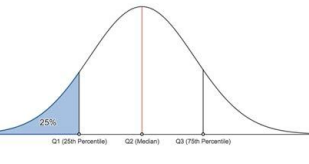

### aggregate()
El método aggregate (con el alias agg) permite hacer un **resumen con las funciones de agregación que querramos.**<br>
Se le puede pasar como argumentos un string con el nombre de la función o la función en sí
(que puede incluir funciones de numpy).<br>
En principio estas funciones se calculan sobre todas las columnas, lo que puede causar resultados inesperados.<br>
Por ejemplo, la función sum aplicada a strings, los concatena todos. Se pueden seleccionar las columnas numéricas con el método **select_dtypes.**

In [160]:
data.select_dtypes("number").aggregate(["sum","min", np.max, "var"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
sum,397386.0,342.000000,2057.000000,21205.170000,466.000000,340.000000,28693.949300
min,1.0,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
amax,891.0,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
var,66231.0,0.236772,0.699015,211.019125,1.216043,0.649728,2469.436846


### value_counts()
El método value_counts para series permite encontrar una **distribución de frecuencias de los valores únicos que contiene.**<br>
Devuelve una serie cuyos índices son los valores únicos de la serie original y sus valores son las respectivas frecuencias.<br>
**El resultado está ordenado de mayor a menor**, de modo que el primer elemento es el más frecuente.<br>
Se puede hacer que se ordene en orden ascendente con el parámetro ascending.<br>
El parámetro **normalize permite obtener las proporciones de cada valor.**

In [163]:
data["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
data["Age"].value_counts(normalize=True)